# Multiple Linear Regression

**Aim**: SWBAT create and interpret a multiple linear regression model, explain the necessity of and perform basic data preparation, and explain what multicolinearity is and how to avoid it. Also, SWBAT check the assumptions of linear regression.

Breaking down today's lecture:
1. What's the point?*
2. How does it work?
3. Muliticolini-what? 
4. Linear Regression Data Prep
5. Linear Regression Assumptions*

*Sections with stars also apply to simple linear regression, too!*

*Notebook based on Flatiron DS Immersive instructor Sean Abu's Multiple Linear Regression lecture.*

# What's the point?

You are a data scientist for the MTA. For your first project, they want you to predict the number of subway riders for each day. You decide to do a linear regression model predict the riders but need to gather data first. With a partner brainstorm a list of different variables you think would explain the number of daily riders. 

## Why multiple linear regression?


Using all of the features you mentioned is _far_ more effective at predicting and understanding ridership!

But, generally speaking, there are 3 major uses for (multiple) linear regression analysis.  

1. Useful to **identify the strength of the effect** that the independent variables have on a dependent variable.
    - Strong or weak relationship? 


2. **Quantitatively forecast effects or impacts of changes.**  That is, multiple linear regression analysis helps us to understand how much will the dependent variable change when we change the independent variables.  
     - Multiple linear regression allows us to do so _comparatively_ -- does one feature have _more_ of an impact than another? 
     - Allows us the answer the question: What is the most important feature when predicting our target? 


3. **Predicts trends and other values outside your dataset.**  The multiple linear regression analysis can be used to get point estimates.

# How does it work?

## Code
Basically the same as what we've already learned!

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [2]:
#read in car data
df = sns.load_dataset('mpg')


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# building a linear regression model using statsmodel 
from statsmodels.formula.api import ols

lr_model = ols(formula='mpg~weight+horsepower+displacement+cylinders+acceleration', data=df).fit()

In [5]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 21 Jul 2020   Prob (F-statistic):          9.82e-101
Time:                        15:09:17   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.2643      2.669     17.331      0.000      41.016      51.513
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Mathematically

Multiple linear regression has the form:
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2  + \beta_3 X_3\cdots + \beta_k X_k + \epsilon$$

### Your turn #1
Based on what we learned about simple linear regression what do each of the following represent?
- $Y$
- $\beta_0$
- $\epsilon$

### What are $\beta_1 ... \beta_n$? How are they computed? 

They are our coefficients of the features in the model, just like in simple linear regression. Each of coefficients represent the impact of $X_i$ on $Y$, *all other features held constant*. 
- If no other features changed, what impact would increasing $X_i$ by one unit have on the other features? 


This is essentially how they are computed! See [this article](https://online.stat.psu.edu/stat462/node/132/) for the methods used to calculate these coefficients (note: this will involve lots of linear algebra, but the article explains all the concepts you'll need to know!).

## The Coefficient of Determination: Another way to think about multiple linear regression

Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. 

Recall the interpretation of $R^2$ in simple linear regression:
- $R^2$ represents the proportion of variance explained by the model. 

**So, we have another interpretation of multiple linear regression:**

By including more predictors, we make the model more complex in an effort to account for more variance in our target.

# Multicollinearity 

### What is it?

**Multicollinearity** occurs when "independent" variables in a regression model are very highly correlated. 
- Note the quotes! This is the crux of the issue. (gets into computation - invertible matrices are inherently comprised of independent columns)
- Correlation is not the _only_ metric that can be used, though a correlation of .7 and above or .9 and above are common thresholds for "too" multicolinear. 
    - VIF is another metric that you can learn about [here](https://www.investopedia.com/terms/v/variance-inflation-factor)

There are two basic kinds of multicollinearity:

- **Structural multicollinearity:** This type occurs when we create a model term using other terms. You produce it, rather than it being inherent to the data.
    - Ex: The salary of a baseball player in dollars and in yen are perfectly correlated 
- **Data multicollinearity:** This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.
    - Ex: How much someone exercises and how much water they drink may be highly correlated 

### What Problems Do Multicollinearity Cause?

Multicollinearity causes the following two basic types of problems:

- The coefficient estimates can swing wildly based on which other independent variables are in the model. The **coefficients become very sensitive to small changes in the model**.
- Multicollinearity **reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model**. You might not be able to trust the p-values to identify independent variables that are statistically significant.

### Do I Have to Fix Multicollinearity?

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

- The **severity of the problems increases with the degree of the multicollinearity**. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
- Multicollinearity **affects only the specific independent variables that are correlated**. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. 
- Multicollinearity **affects the coefficients and p-values, but it does not influence the predictions**, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

***That being said, the easiest way to deal with multicollinearity is just to remove one of the variables.***

### Code time!

In [6]:
# Compute the correlation matrix
corr = df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


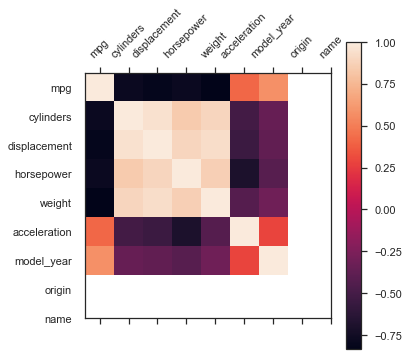

In [7]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

Ooof, that's one ugly heatmap -- let's make a better one so we can really see what's going on.

#### Create a Better Looking Heatmap with Seaborn

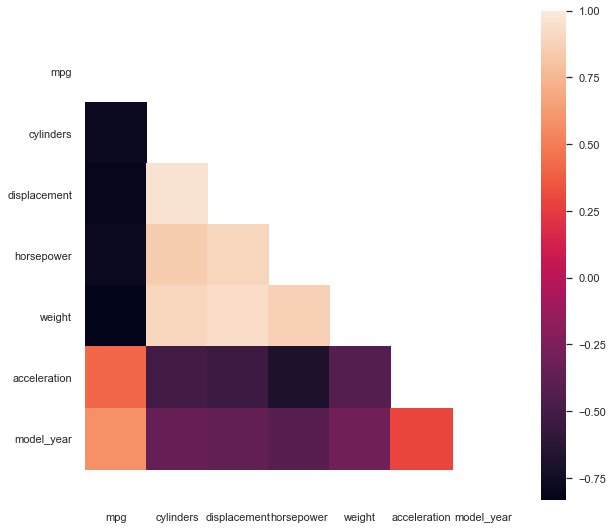

In [8]:
# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Much better! Now, you try running a model with the appropriate, non-correlated, features.

#### Rerun the model after removing the highly correlated variables

In [26]:
mlr_model = ols(formula='mpg~cylinders+accleration+model_year', data=df).fit()
mlr_model.____()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     413.9
Date:                Sun, 19 Jul 2020   Prob (F-statistic):          1.97e-139
Time:                        13:39:11   Log-Likelihood:                -1054.0
No. Observations:                 398   AIC:                             2118.
Df Residuals:                     393   BIC:                             2138.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -13.7070      4.052     -3.383      0.001     -21.673      -5.741
cylinders       -0.2516      0.329     -0.766      0.444      -0.898       0.394
displacement     0.0047      0.007      0.707      0.480      -0.008       0.018
weight          -0.0068      0.001    -11.811      0.000      -0.008      -0.006
model_year       0.7595      0.051     15.007      0.000       0.660       0.859
==============================================================================
Omnibus:                       42.235   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.410
Skew:                           0.665   Prob(JB):                     5.14e-16
Kurtosis:                       4.573   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression Data Prep

## Handling Categorical Data

In [9]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

For the column of `origin`, we can see that the values come through as strings that represent a category.  We can not put a string through as a value for a linear model. Instead we use dummy variables.

A **dummy variable** (aka, an indicator variable) is a numeric variable that represents categorical data, such as gender, race, political affiliation, etc.
- Typically, 1 represents the presence of a qualitative attribute, and 0 represents the absence.

In [10]:
pd.get_dummies(df['origin'])

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


By creating these dummy variables. We can now include them in the model.  

In [11]:
pd.get_dummies(df, columns=['origin'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,0,0,1


In [12]:
dummy_df = pd.get_dummies(df, columns=['origin'])

In [36]:
dummy_model = ols(formula='mpg~weight+horsepower+cylinders+acceleration+origin_europe+origin_japan', data=dummy_df).fit()
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sun, 19 Jul 2020   Prob (F-statistic):          4.20e-103
Time:                        14:00:21   Log-Likelihood:                -1111.8
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     385   BIC:                             2265.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        43.7601      2.502     17.488      0.000      38.840      48.680
weight           -0.0044      0.001     -5.956      0.000      -0.006      -0.003
horsepower       -0.0548      0.016     -3.433      0.001      -0.086      -0.023
cylinders        -0.2515      0.307     -0.820      0.412      -0.854       0.351
acceleration     -0.0454      0.123     -0.369      0.712      -0.287       0.196
origin_europe     0.8492      0.663      1.282      0.201      -0.454       2.152
origin_japan      2.6731      0.661      4.043      0.000       1.373       3.973
==============================================================================
Omnibus:                       38.033   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.486
Skew:                           0.676   Prob(JB):                     1.47e-12
Kurtosis:                       4.229   Cond. No.                     3.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**But wait!, you say. We didn't include the `origin_usa` column in this model!**

- That dummy variable would redundant; it carries no new information. What issue that we've discussed does this relate to? 
    - Hint: If we know the value of the `origin_europe` and the `origin'japan` columns, then we also know the value of the `origin_usa` column.

Using all the dummy variables derived from a category is known as the dummy variable trap. Avoid this trap!
- Either don't include in the model _or_ use the parameter `drop_first=True` (see below)

In [33]:
pd.get_dummies(df, columns=['origin'], drop_first=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,0,1


### Interpreting the coefficients of Dummy Variables 

Look at our model output from above. If a car originated in Japan, it will have a value of 1 for the variable `origin_japan`. So we would multiply the value of 1 by the coefficient for that variable and add that to our final MPG prediction.  

If the car orginated in the USA it would have a value of zero for both the `origin_japan` and `origin_europe` columns. Therefore, the coefficients for those variables who not impact the final prediction. 

## Scaling Data

Most of the times, your dataset will contain features highly varying in magnitudes, units and range (ex: acceleration and range). For linear regression models, this makes it difficult to compare the sizes of the coefficients for different variables. We want to **get everything on the same scale so that nothing comes accross as more or less important because of the way it's measured**.

Three common ways to scale the data are:
1. **Standardization**: This redistributes the features with their mean μ = 0 and standard deviation σ =1 . `sklearn.preprocessing.scale` helps us implementing standardization in python. 
$$x' =\frac{x-\bar{x}}{\sigma}$$

2. **Mean Normalization**: This distribution will have values between -1 and 1 with μ=0.

$$x' =\frac{x-\bar{x}}{max(x)- min(x)}$$

3. **Min-Max Scaling**: This scaling brings the value between 0 and 1.

$$x' =\frac{x-min(x)}{max(x)- min(x)}$$



https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
# get rid of origin_usa because of multicollinearity and 
# name because it's a string
dummy_df.drop(['name', 'origin_usa'], axis=1, inplace=True)
scaled_df = scaler.fit_transform(dummy_df)

In [52]:
subset= ['cylinders', 'horsepower', 'weight',
       'acceleration', 'origin_europe', 'origin_japan']

In [53]:
subset_scaled = []
for var in subset:
    new_col = var +"_scaled"
    dummy_df[new_col] = scaler.fit_transform(dummy_df[[var]])
    subset_scaled.append(new_col)

In [54]:
dummy_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,cylinders_scaled,horsepower_scaled,weight_scaled,acceleration_scaled,origin_europe_scaled,origin_japan_scaled
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1.498191,0.664133,0.630870,-1.295498,-0.461968,-0.497643
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1.498191,1.574594,0.854333,-1.477038,-0.461968,-0.497643
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1.498191,1.184397,0.550470,-1.658577,-0.461968,-0.497643
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1.498191,1.184397,0.546923,-1.295498,-0.461968,-0.497643
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1.498191,0.924265,0.565841,-1.840117,-0.461968,-0.497643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,-0.856321,-0.480448,-0.213324,0.011586,-0.461968,-0.497643
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,-0.856321,-1.364896,-0.993671,3.279296,2.164651,-0.497643
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,-0.856321,-0.532474,-0.798585,-1.440730,-0.461968,-0.497643
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,-0.856321,-0.662540,-0.408411,1.100822,-0.461968,-0.497643


In [55]:
scaled_model = ols(formula='mpg~weight_scaled+horsepower_scaled+cylinders_scaled+acceleration_scaled+origin_europe_scaled+origin_japan_scaled', data=dummy_df).fit()
scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sun, 19 Jul 2020   Prob (F-statistic):          4.20e-103
Time:                        14:11:08   Log-Likelihood:                -1111.8
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     385   BIC:                             2265.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               23.4747      0.210    111.564      0.000      23.061      23.888
weight_scaled           -3.7487      0.629     -5.956      0.000      -4.986      -2.511
horsepower_scaled       -2.1054      0.613     -3.433      0.001      -3.311      -0.900
cylinders_scaled        -0.4273      0.521     -0.820      0.412      -1.451       0.597
acceleration_scaled     -0.1250      0.338     -0.369      0.712      -0.790       0.540
origin_europe_scaled     0.3233      0.252      1.282      0.201      -0.173       0.819
origin_japan_scaled      1.0662      0.264      4.043      0.000       0.548       1.585
==============================================================================
Omnibus:                       38.033   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.486
Skew:                           0.676   Prob(JB):                     1.47e-12
Kurtosis:                       4.229   Cond. No.                         7.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚚 🚛 🚜 🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚚 🚛 🚜 🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚚 🚛 🚜 🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚚 🚛 🚜

Now our coefficients are on a similiar scale which allows us to compare the size of the coeffiecents to make some inferences about which features have a bigger impact on the MPG of a car. 

# Linear Regression Assumptions

## 1. There is a linear relationship

This model _cannot_ model non-linear relationships, as discussed previously!

## 2. Independence of Observations

Columns should be independent, but we also cannot have one row depend on the next.

Ex: If you shuffled the rows, would the data still make sense?
- One example where this would not be the case - stock prices! Each day is related to the last (theoretically?).

## 3. Errors are normally distributed and 4. Homescedasticity of errors

Basically, when we plot our residuals, we don't want to see a trend in what we get wrong.

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_e99c/lightboxImage.img.png/1548702854476.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_7320/lightboxImage.img.png/1548702854735.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_dccd/lightboxImage.img.png/1548702855060.png' width=700>

[Source](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/)

# Other resources to consult

Everything about regression:  https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-tutorial-and-examples

Statsmodels example: https://datatofish.com/statsmodels-linear-regression/